In [1]:
from BioLink.biolink_client import BioLinkWrapper
import pandas as pd
from pprint import pprint
from collections import defaultdict
from mygene import MyGeneInfo
from GraphVisuals.graphviz_wrapper import PathGraph

## Module declaration

In [2]:
worklow_modules = [
    ('Mod1A', 'Mod1A Functional Similarity'),
    ('Mod1B', 'Mod1B Phenotype Similarity'),
    ('Mod1C', 'Mod1C Coexpression'),
    ('Mod1D', 'Mod1D Gene Chemical Interaction'),
    ('Mod1E', 'Mod1E Gene Interaction'),
    ('Mod3', 'Mod3 Candidate Merging')
]

In [3]:
# start a list of final candidates from each module
results = list()

## Workflow input

# Mod0 Input Lookup
## Get Disease associated genes from BioLink API api.monarchinitative.org

In [4]:
from Modules.Mod0_lookups import LookUp

# workflow input is a disease identifier
lu = LookUp()

Mod O DiseaseGeneLookup metadata:
{'data_type': 'disease',
 'input_type': {'complexity': 'single', 'id_type': ['MONDO', 'DO', 'OMIM']},
 'limit': None,
 'output_type': {'complexity': 'set', 'id_type': 'HGNC'},
 'predicate': 'blm:gene associated with condition',
 'source': 'Monarch Biolink',
 'taxon': 'human'}


In [5]:
input_disease = 'MONDO:0019391' # Fanconi anemia  
input_object = {
    'input': input_disease,
    'parameters': {
        'taxon': 'human',
        'threshold': None,
    },
}

lu.load_input_object(input_object=input_object)
input_object = lu.input_object

{'description': 'Fanconi anemia (FA) is a hereditary DNA repair disorder '
                'characterized by progressive pancytopenia with bone marrow '
                'failure, variable congenital malformations and predisposition '
                'to develop hematological or solid tumors.',
 'id': 'MONDO:0019391',
 'label': 'Fanconi anemia'}


In [6]:
# instantiate workflow graph
path_graph = PathGraph(input_curie=input_object['id'], input_label=input_object['label'])
path_graph.load_nodes(node_list=worklow_modules)

In [7]:
# get genes associated with disease from Biolink
disease_associated_genes = lu.disease_geneset_lookup()
# create list of gene curies for downstream module input
input_curie_set = disease_associated_genes['hit_id'].tolist()
# # show the 
disease_associated_genes

,input_id,input_label,hit_id,hit_label,ncbi,sources
0,MONDO:0019391,Fanconi anemia,HGNC:1100,BRCA1,NCBIGene:672,clinvar
1,MONDO:0019391,Fanconi anemia,HGNC:1101,BRCA2,NCBIGene:675,"orphane, omim, ctd, orphane, clinvar"
2,MONDO:0019391,Fanconi anemia,HGNC:11892,TNF,NCBIGene:7124,ctd
3,MONDO:0019391,Fanconi anemia,HGNC:12829,XRCC2,NCBIGene:7516,"orphane, ctd, omim"
4,MONDO:0019391,Fanconi anemia,HGNC:20473,BRIP1,NCBIGene:83990,"ctd, orphane, omim, ctd, clinvar"
5,MONDO:0019391,Fanconi anemia,HGNC:20748,FANCL,NCBIGene:55120,"ctd, orphane, ctd, omim, clinvar"
6,MONDO:0019391,Fanconi anemia,HGNC:23168,FANCM,NCBIGene:57697,"ctd, orphane"
7,MONDO:0019391,Fanconi anemia,HGNC:23845,SLX4,NCBIGene:84464,"ctd, orphane, ctd, omim, clinvar"
8,MONDO:0019391,Fanconi anemia,HGNC:25009,UBE2T,NCBIGene:29089,"omim, ctd, clinvar, orphane"
9,MONDO:0019391,Fanconi anemia,HGNC:25539,RFWD3,NCBIGene:55159,orphane


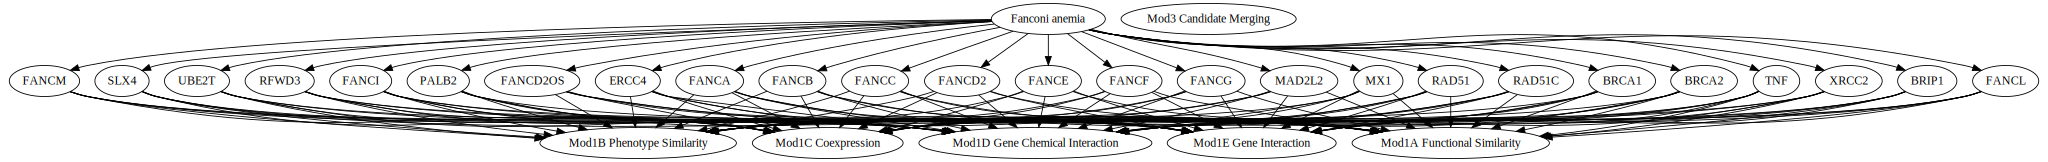

In [8]:
# graph disease genes 2 mod1
path_graph.load_nodes(list(zip(disease_associated_genes['hit_id'], disease_associated_genes['hit_label'])))
path_graph.module_outputs(output_gene_set=input_curie_set, module_id=path_graph.conv_pref(input_disease))
for module in worklow_modules[:-1]:
    path_graph.module_inputs(input_gene_set=input_curie_set, module_id=module[0])
path_graph.path_graph

In [9]:
# add Mod0 results to ouput
for index, row in disease_associated_genes.iterrows():
    results.append({
        'input_curie': row[0],
        'input_name': row[1],
        'output_curie': row[2],
        'output_name': row[3],
        'module': 'Mod0',
        'score': None,
    }) 

# Mod1A Functional Similarity
## Find similar genes based on GO functional annotations using OntoBio Jaccard similarity

In [10]:
from Modules.Mod1A_functional_sim import FunctionalSimilarity

# Module specification
mod1a_input_object = {
    'input': input_curie_set,
    'parameters': {
        'taxon': 'human',
        'threshold': 0.3,
    },
}
    
func_sim = FunctionalSimilarity()

/Users/tputman/.virtualenvs/modules/lib/python3.6/site-packages/cachier/mongo_core.py:24: UserWarning: Cachier warning: pymongo was not found. MongoDB cores will not work.
  "Cachier warning: pymongo was not found. MongoDB cores will not work.")


Mod1A Functional Similarity metadata:
{'input_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'output_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'predicate': ['blm:macromolecular machine to biological process association',
               'macromolecular machine to molecular activity association'],
 'source': 'Monarch Biolink'}


In [11]:
mod1a_input_object = {
    'input': input_curie_set,
    'parameters': {
        'taxon': 'human',
        'threshold': 0.75,
    },
}
func_sim.load_input_object(mod1a_input_object)
func_sim.load_gene_set() 
func_sim.load_associations()

In [12]:
Mod1A_results = pd.DataFrame(func_sim.compute_similarity())

In [13]:
Mod1A_results = Mod1A_results[~Mod1A_results['hit_curie'].isin(input_curie_set)]

In [14]:
Mod1A_results

,hit_curie,hit_name,hit_score,input_curie,input_name
8,HGNC:20922,SLX1A,0.782313,HGNC:23845,SLX4
15,HGNC:26171,FAAP100,0.857143,HGNC:3583,FANCB
16,HGNC:25021,ASTE1,0.793103,HGNC:3583,FANCB
17,HGNC:21700,RAD9B,0.920000,HGNC:3583,FANCB
18,HGNC:22223,EEPD1,0.785714,HGNC:3583,FANCB
20,HGNC:28467,FAAP24,0.827586,HGNC:3583,FANCB
22,HGNC:24994,INIP,0.851852,HGNC:3583,FANCB
25,HGNC:26171,FAAP100,0.785714,HGNC:3586,FANCE
26,HGNC:21700,RAD9B,0.840000,HGNC:3586,FANCE
27,HGNC:22223,EEPD1,0.777778,HGNC:3586,FANCE


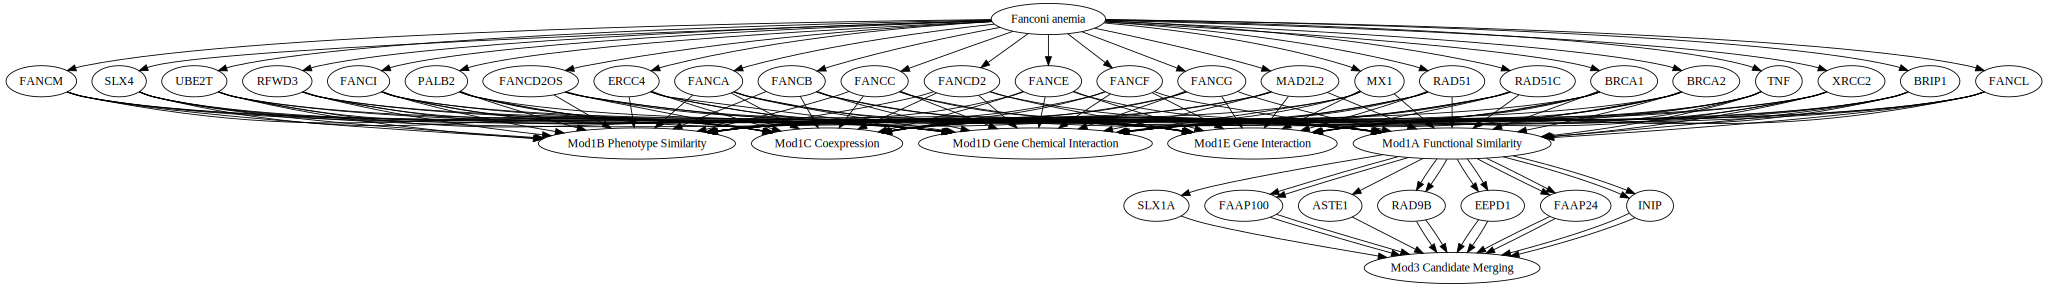

In [15]:
path_graph.load_nodes(list(zip(Mod1A_results['hit_curie'], Mod1A_results['hit_name'])))
path_graph.module_inputs(input_gene_set=Mod1A_results['hit_curie'].tolist(), module_id='Mod3')
path_graph.module_outputs(output_gene_set=Mod1A_results['hit_curie'].tolist(), module_id='Mod1A')
path_graph.path_graph

In [16]:
# add Mod1A results to ouput
for index, row in Mod1A_results.iterrows():
    results.append({
        'input_curie': row[0],
        'input_name': row[1],
        'output_curie': row[2],
        'output_name': row[3],
        'module': 'Mod1A',
        'score': row[4],
    }) 

# MOD1B Phenotype Similarity
## Find similar genes based on OwlSim calculated Phenotype Similarity

In [17]:
from Modules.Mod1B_phenotype_similarity import PhenotypeSimilarity

mod1b_input_object = {
    'input': input_curie_set,
     'parameters': {
        'taxon': 'human',
        'threshold': 100,
    },
}

# Module specification
pheno_sim = PhenotypeSimilarity()

Mod1B Phenotype Similarity metadata:
{'input_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'output_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'predicate': ['blm:has phenotype'],
 'source': 'Monarch Biolink'}


In [18]:
pheno_sim.load_input_object(mod1b_input_object)
pheno_sim.load_gene_set()
pheno_sim.load_associations()

In [19]:
# compute phenotype similarity
Mod1B_results = pd.DataFrame(pheno_sim.compute_similarity(sim_type='disease'))

In [20]:
Mod1B_results

,input_id_x,id,label_x,summed_score
0,HGNC:1100,MONDO:0009214,Fanconi anemia complementation group D2,159.0
1,HGNC:1100,MONDO:0009213,Fanconi anemia complementation group C,159.0
2,HGNC:1100,MONDO:0009215,Fanconi anemia complementation group a,159.0
3,HGNC:1100,MONDO:0010953,Fanconi anemia complementation group E,158.0
5,HGNC:1100,MONDO:0012565,Fanconi anemia complementation group N,137.0
6,HGNC:1100,MONDO:0008315,prostate cancer,148.0
9,HGNC:1100,MONDO:0011584,Fanconi anemia complementation group D1,133.0
14,HGNC:1100,MONDO:0009997,Roberts syndrome,129.0
24,HGNC:1100,MONDO:0015909,aplastic anemia,136.0
33,HGNC:1100,MONDO:0002691,liver cancer,134.0


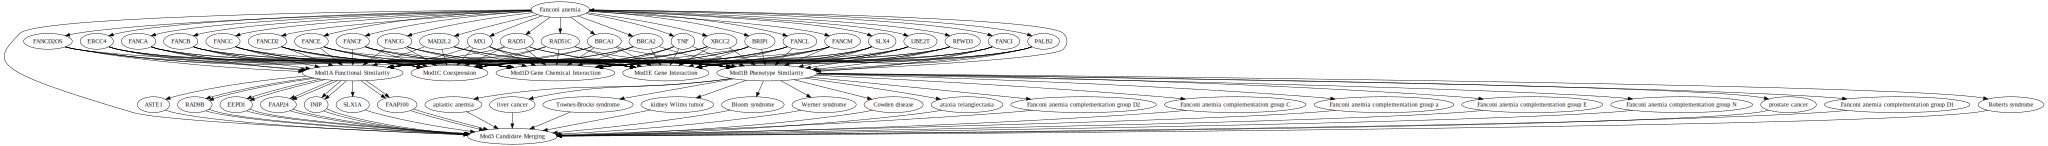

In [21]:
path_graph.load_nodes(list(zip(Mod1B_results['id'], Mod1B_results['label_x'])))
path_graph.module_outputs(output_gene_set=Mod1B_results['id'].tolist(), module_id='Mod1B')
path_graph.module_inputs(input_gene_set=Mod1B_results['id'].tolist(), module_id='Mod3')
path_graph.path_graph

In [22]:
# graph mod1B genes 2 Mod3
for index, row in Mod1B_results.iterrows():
    results.append({
        'input_curie': row[-1],
        'input_name': None,
        'output_curie': row[1],
        'output_name': row[2],
        'module': 'Mod1B',
        'score': row[3]
    }) 

# Mod1C Coexpression

In [23]:
# TODO

# Mod1D Chemical Gene Interactions

In [24]:
# TODO

# Mod1E Gene Interactions

In [25]:
from Modules.Mod1E_interactions import GeneInteractions
gene_inter = GeneInteractions()

Mod1E Interaction Network metadata:
{'input_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'output_type': {'complexity': 'set', 'data_type': 'gene', 'id_type': 'HGNC'},
 'predicate': ['blm:interacts with'],
 'source': 'Monarch Biolink'}


In [26]:
mod1e_input_object = {
    'input': input_curie_set,
     'parameters': {
        'taxon': 'human',
        'threshold': None,
    },
}
gene_inter.load_input_object(input_object=mod1e_input_object)
gene_inter.load_gene_set()

In [27]:
Mod1E_results = pd.DataFrame(gene_inter.get_interactions())

In [28]:
Mod1E_results

,hit_curie,hit_name,hit_score,input_curie,input_label
0,HGNC:744,ASH2L,None,HGNC:1100,BRCA1
1,HGNC:1173,PPP6R3,None,HGNC:1100,BRCA1
2,HGNC:9534,PSMA5,None,HGNC:1100,BRCA1
3,HGNC:11824,TINF2,None,HGNC:1100,BRCA1
4,HGNC:20771,TUBB4B,None,HGNC:1100,BRCA1
5,HGNC:12407,TUBA4A,None,HGNC:1100,BRCA1
6,HGNC:6898,MARS,None,HGNC:1100,BRCA1
7,HGNC:6190,JAK1,None,HGNC:1100,BRCA1
8,HGNC:12761,WEE1,None,HGNC:1100,BRCA1
9,HGNC:17364,DBF4,None,HGNC:1100,BRCA1


In [29]:
Mod1E_results = Mod1E_results[~Mod1E_results['hit_name'].isin(disease_associated_genes['hit_label'])]

In [30]:
grouped_Mod1E_results = Mod1E_results.groupby(['hit_curie', 'hit_name'])['input_curie'].apply(', '.join).reset_index()
trimmed_Mod1E_results = list()
for index, row in grouped_Mod1E_results.iterrows():
    if len(row[-1].split(',')) > 3:
        trimmed_Mod1E_results.append(row)
Mod1E_results = pd.DataFrame(trimmed_Mod1E_results, columns=['hit_curie', 'hit_name', 'input_curie']).reset_index()
Mod1E_results

,index,hit_curie,hit_name,input_curie
0,7,HGNC:10289,RPA1,"HGNC:1101, HGNC:12829, HGNC:20748, HGNC:23168,..."
1,8,HGNC:10290,RPA2,"HGNC:1100, HGNC:1101, HGNC:12829, HGNC:20473, ..."
2,9,HGNC:10291,RPA3,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
3,14,HGNC:10417,RPS27A,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
4,22,HGNC:1058,BLM,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."
5,51,HGNC:11272,SPTA1,"HGNC:12829, HGNC:20473, HGNC:3582, HGNC:3584, ..."
6,52,HGNC:11273,SPTAN1,"HGNC:11892, HGNC:3436, HGNC:3582, HGNC:3584, H..."
7,62,HGNC:11422,CENPX,"HGNC:20748, HGNC:23168, HGNC:23845, HGNC:25009..."
8,100,HGNC:11989,TOP2A,"HGNC:1101, HGNC:25568, HGNC:26144, HGNC:9820"
9,101,HGNC:11992,TOP3A,"HGNC:1101, HGNC:12829, HGNC:20473, HGNC:20748,..."


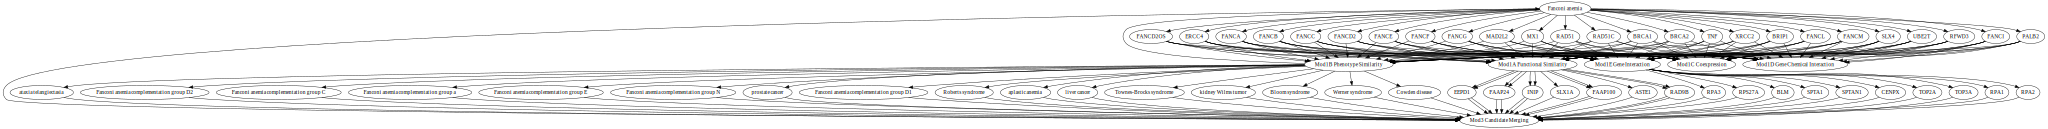

In [31]:
path_graph.load_nodes(list(zip(Mod1E_results['hit_curie'], Mod1E_results['hit_name']))[:10])
path_graph.module_outputs(output_gene_set=Mod1E_results['hit_curie'].tolist()[:10], module_id='Mod1E')
path_graph.module_inputs(input_gene_set=Mod1E_results['hit_curie'].tolist()[:10], module_id='Mod3')
path_graph.path_graph

In [32]:
# graph mod1E genes 2 Mod3
for index, row in Mod1E_results.iterrows():
    results.append({
        'input_curie': row[-1],
        'input_name': None,
        'output_curie': row[1],
        'output_name': row[2],
        'module': 'Mod1E',
        'score': None
    })

In [33]:
results_df = pd.DataFrame(results)

In [34]:
results_df

,input_curie,input_name,module,output_curie,output_name,score
0,MONDO:0019391,Fanconi anemia,Mod0,HGNC:1100,BRCA1,None
1,MONDO:0019391,Fanconi anemia,Mod0,HGNC:1101,BRCA2,None
2,MONDO:0019391,Fanconi anemia,Mod0,HGNC:11892,TNF,None
3,MONDO:0019391,Fanconi anemia,Mod0,HGNC:12829,XRCC2,None
4,MONDO:0019391,Fanconi anemia,Mod0,HGNC:20473,BRIP1,None
5,MONDO:0019391,Fanconi anemia,Mod0,HGNC:20748,FANCL,None
6,MONDO:0019391,Fanconi anemia,Mod0,HGNC:23168,FANCM,None
7,MONDO:0019391,Fanconi anemia,Mod0,HGNC:23845,SLX4,None
8,MONDO:0019391,Fanconi anemia,Mod0,HGNC:25009,UBE2T,None
9,MONDO:0019391,Fanconi anemia,Mod0,HGNC:25539,RFWD3,None


In [35]:
results_df.groupby(['output_name', 'output_curie'])['module'].apply(', '.join).reset_index().reset_index()

,index,output_name,output_curie,module
0,0,APP,HGNC:620,Mod1E
1,1,ATM,HGNC:795,Mod1E
2,2,ATR,HGNC:882,Mod1E
3,3,ATRIP,HGNC:33499,Mod1E
4,4,BARD1,HGNC:952,Mod1E
5,5,BLM,HGNC:1058,Mod1E
6,6,BRCA1,HGNC:1100,Mod0
7,7,BRCA2,HGNC:1101,Mod0
8,8,BRCC3,HGNC:24185,Mod1E
9,9,BRIP1,HGNC:20473,Mod0
